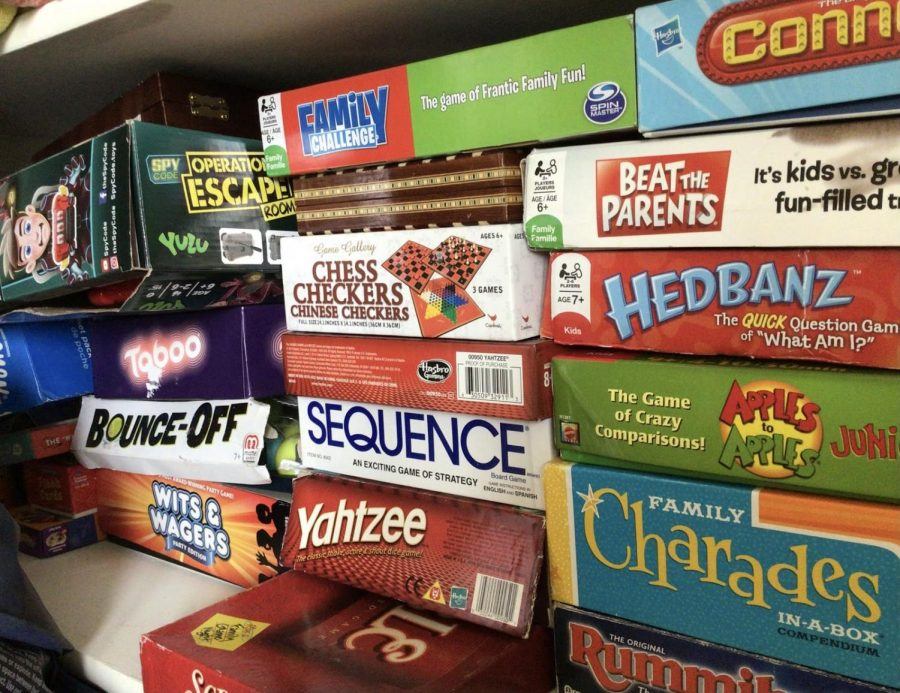

# Boardgames Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

###########################################################################################################################

## Loading data and Initial EDA:

In [ ]:
brdg_df = pd.read_csv("boardgames1.csv")

- Renamed few columns for clarity and future analysis:

In [ ]:
brdg_df.columns = brdg_df.columns.str.replace("baverage","geek_rating")
brdg_df.columns = brdg_df.columns.str.replace("average","average_rating")
brdg_df.columns = brdg_df.columns.str.replace("boardgamehonor_cnt","award_counts")
brdg_df.columns = brdg_df.columns.str.replace("news","BGG_news")
brdg_df.columns = brdg_df.columns.str.replace("blogs","BGG_blogs")

- Displaying column names of the dataset and first few rows of the data:

In [ ]:
# brdg_df.columns

In [ ]:
#brdg_df.head(10)

- Basic numerical EDA:

In [ ]:
#brdg_df.describe()

- Correlation for all numerical data columns of interest:

In [ ]:
# brdg_df.corr().head(20)

- Creating a categories column for different geek ratings:

In [ ]:
brdg_df["geek_rating_category"] = brdg_df["geek_rating"]\
            .apply(lambda x: "Geek rating > 7" if x >=7\
                   else "Geek rating > 6 and < 7" if x<7 and x>=6\
                   else "Geek rating > 5 and < 6" if x<6 and x>=5\
                   else "Geek rating < 5")

In [ ]:
brdg_df["geek_rating_category"].value_counts(normalize=True)

- Creating a categories column for different site views:

In [ ]:
brdg_df["site_views_category"] = brdg_df["siteviews"]\
            .apply(lambda x: "Site Views > 25K" if x >=25000\
                   else "Site Views < 25K")

In [ ]:
brdg_df["site_views_category"].value_counts()

In [ ]:
brdg_df.columns

###########################################################################################################################

## Evaluating geek ratings for all games:

- Displaying ratings density plot:

In [ ]:
sns.set(rc={"figure.figsize":(11, 6)})
sns.kdeplot(brdg_df["geek_rating"], shade = True, color="orange").set_title("Board Game Ratings",fontsize = 20)
plt.xlabel("Geek Ratings", fontsize = 15)
plt.ylabel("Density", fontsize = 15)

- Displaying histogram of game counts per rating category:

In [ ]:
sns.histplot(brdg_df["geek_rating_category"], color = "teal")
plt.xlabel("Geek Rating Categories",fontsize = 15)
plt.ylabel("Game Counts",fontsize = 15)
plt.title("Histogram of Geek Ratings", fontsize = 20)

###########################################################################################################################

## Evaluation of 150 highest rated boardgames and site views:

- Top 150 board games sorted by game geek ratings:

In [ ]:
rating_views_top = brdg_df[["name","geek_rating","siteviews"]]\
        .sort_values("geek_rating",ascending=False).head(150)
rating_views_top

In [ ]:
rating_views_top.describe()

- Correlation between geek ratings and site views:

In [ ]:
rating_views_top.corr()

- Distribution of geek ratings for top 150 games:

In [ ]:
plt.figure(2)

plt.subplot(121)
sns.kdeplot(rating_views_top["geek_rating"], color="violet",shade = True)\
                    .set_title("Top 150 Board Game Ratings", fontsize = 15)
plt.xlabel("Geek Ratings", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(122)
rating_views_top["geek_rating"].plot.box(figsize=(15,5), color = "green").set_title("Top 150 Board Game Ratings", fontsize = 15)
plt.xlabel("Geek Ratings", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

- Trend showing relation between site views and geek ratings for top 150 games:

In [ ]:
sns.lmplot("geek_rating", "siteviews", rating_views_top, height=6, aspect=1.8)
plt.xlabel("Geek Ratings", fontsize = 15)
plt.ylabel("Site Views", fontsize = 15)
plt.title("Top 150: site views vs. geek ratings", fontsize = 20)

### Evaluation of 150 lowest rated boardgames and site views:

- Bottom 150 board games sorted by game geek ratings:

In [ ]:
rating_views_bottom = brdg_df[["name","geek_rating","siteviews"]]\
        .sort_values("geek_rating",ascending=False)\
        .loc[brdg_df.geek_rating > 0,:].tail(150)
rating_views_bottom

In [ ]:
rating_views_bottom.describe()

- Correlation between geek ratings and site views:

In [ ]:
rating_views_bottom.corr()

- Distribution of geek ratings for bottom 150 games:

In [ ]:
plt.figure(2)

plt.subplot(121)
sns.kdeplot(rating_views_bottom["geek_rating"],color="violet",shade = True)\
            .set_title("Bottom 150 Board Game Ratings", fontsize = 15)
plt.xlabel("Geek Ratings", fontsize = 12)
plt.ylabel("Density", fontsize = 12)


plt.subplot(122)
rating_views_bottom["geek_rating"].plot.box(figsize=(15,5), color = "green").set_title("Bottom 150 Board Game Ratings", fontsize = 15)
plt.xlabel("Geek Ratings", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

- Trend showing relation between site views and geek ratings for bottom 150 games:

In [ ]:
sns.lmplot("geek_rating", "siteviews", rating_views_bottom, height=6, aspect=1.8)
plt.xlabel("Geek Ratings", fontsize = 15)
plt.ylabel("Site Views", fontsize = 15)
plt.title("Bottom 150 site views vs. geek ratings", fontsize = 20)

- Trend showing relation between site views and geek ratings for all games:

In [ ]:
sns.lmplot("geek_rating", "siteviews", brdg_df.loc[brdg_df.geek_rating > 4.5,:], height=6, aspect=1.8)
plt.xlabel("Geek Ratings", fontsize = 15)
plt.ylabel("Site Views", fontsize = 15)
plt.title("Trend depicting site views and geek ratings", fontsize = 20)

###########################################################################################################################

## Evaluating geek ratings vs game awards:

- Board games displayed whose ratings are > 0 and award counts are > 0:

In [ ]:
honor_df = brdg_df[["name","geek_rating","geek_rating_category","award_counts"]]\
                .sort_values("geek_rating",ascending=False)\
                .loc[(brdg_df.geek_rating > 0) & (brdg_df.award_counts > 0)]

In [ ]:
honor_df.describe()

- Correlation between geek ratings and award counts:

In [ ]:
honor_df.corr()

### Number of awards for top and bottom 20 board games (sorted by rating):

In [ ]:
top_20 = honor_df.head(20)

In [ ]:
plt.figure(figsize = (22,12))
plt.barh(top_20.name, top_20.award_counts, color ="maroon")
plt.xlabel("Number of awards won", fontsize = 22)
plt.title("Number of awards for top-rated games", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [ ]:
bottom_20 = honor_df.tail(20)

In [ ]:
plt.figure(figsize = (22,12))
plt.barh(bottom_20.name, bottom_20.award_counts, color ="rebeccapurple")
plt.xlabel("Number of awards won", fontsize = 22)
plt.title("Number of awards for top-rated games", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

### Plotting average award counts for each geek rating category :

In [ ]:
award_df = pd.DataFrame(honor_df.groupby("geek_rating_category")["award_counts"].mean()).reset_index()
award_df

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = "geek_rating_category", y = "award_counts", data = award_df, errwidth=0, palette='pastel')
plt.xlabel("Geek Rating Categories", fontsize = 18)
plt.ylabel("Award Counts", fontsize = 18)
plt.title("Average award counts for different rating categories", fontsize = 23)

###########################################################################################################################

### Evaluating geek ratings vs game awards:

- Histogram of game site views:

In [ ]:
plt.hist(np.log(brdg_df['siteviews']), color = "lightcoral")
plt.title('Game Site Views', fontsize = 20)

- Site views per rating category:

In [ ]:
siteviews_df = pd.DataFrame(brdg_df.groupby('geek_rating_category')["siteviews"].median()).reset_index()
siteviews_df

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = "geek_rating_category", y = "siteviews", data = siteviews_df, errwidth=0)
plt.xlabel('Geek Rating Categories', fontsize = 18)
plt.ylabel('Site Views', fontsize = 18)
plt.title('Median of site views for different rating categories', fontsize = 23)

###########################################################################################################################

### Evaluating site views vs different media types:

- Selected outside media counts and compared with siteviews for each rating category:

In [ ]:
media_df = brdg_df[["geek_rating","geek_rating_category","siteviews","podcast","weblink"]]\
                   .loc[brdg_df.geek_rating > 0,:]\
                   .loc[brdg_df.siteviews < 6.0e+6,:]\
                   .loc[((brdg_df.podcast > 0) & (brdg_df.podcast < 500)) & (brdg_df.weblink > 0)]

In [ ]:
media_df

- Correlation between outside media counts and siteviews:

In [ ]:
media_df[["siteviews","podcast","weblink"]].corr()

- Trend showing relation between site views and podcasts about the game:

In [ ]:
sns.set(rc={"figure.figsize":(15, 11)})
sns.regplot(x=media_df["siteviews"], y=media_df["podcast"])
plt.xlabel("Site Views", fontsize = 15)
plt.ylabel("Podcast Counts", fontsize = 15)
plt.title("Podcast Counts vs. Site Views", fontsize = 20)

- Trend showing relation between site views and weblinks for different online media articles about the game:

In [ ]:
sns.set(rc={"figure.figsize":(15, 11)})
sns.regplot(x=media_df["siteviews"], y=media_df["weblink"])
plt.xlabel("Site Views", fontsize = 15)
plt.ylabel("Weblink Counts", fontsize = 15)
plt.title("Weblink Counts vs. Site Views", fontsize = 20)

- Selected BGG media counts and compared with siteviews for each rating category:

In [ ]:
bgg_site_df = brdg_df[["geek_rating","geek_rating_category","siteviews","BGG_news","BGG_blogs"]]\
                    .loc[brdg_df.geek_rating > 0,:]\
                    .loc[brdg_df.siteviews < 6.0e+6,:]\
                    .loc[(brdg_df.BGG_news > 0) & (brdg_df.BGG_blogs > 0)]

In [ ]:
bgg_site_df

- Correlation between BGG media counts and siteviews:

In [ ]:
bgg_site_df[["siteviews","BGG_news","BGG_blogs"]].corr()

- Trend showing relation between site views and BGG written articles about the game (posted on game page on BGG website):

In [ ]:
sns.set(rc={"figure.figsize":(15, 11)})
sns.regplot(x=bgg_site_df["siteviews"], y=bgg_site_df["BGG_news"])
plt.xlabel("Site Views", fontsize = 15)
plt.ylabel("BGG news articles", fontsize = 15)
plt.title("BGG news articles vs. Site Views", fontsize = 20)

In [ ]:
sns.set(rc={"figure.figsize":(15, 11)})
sns.regplot(x=bgg_site_df["siteviews"], y=bgg_site_df["BGG_blogs"])
plt.xlabel("Site Views", fontsize = 15)
plt.ylabel("BGG blog posts", fontsize = 15)
plt.title("BGG blog posts vs. Site Views", fontsize = 20)

###########################################################################################################################

## Evaluating minimum playing time for games per category:

- Two categories were choosen for this evaluation, Geek rating > 6 and < 7 and Geek rating > 7

In [ ]:
minplaytime_df = brdg_df[["geek_rating_category","minplaytime",]]\
                             .groupby(["geek_rating_category","minplaytime"])\
                             .size().reset_index(name="No. of games")

- Bar graphs displaying how many games had highest percentage of certain minimum playing time:

In [ ]:
minplaytime_6_7 = minplaytime_df.loc[minplaytime_df["geek_rating_category"] == "Geek rating > 6 and < 7"]\
                     .sort_values(by="No. of games")

minplaytime_6_7["percent_of_games"] = (minplaytime_6_7["No. of games"]/sum(minplaytime_6_7["No. of games"]))*100
minplaytime_6_7 = minplaytime_6_7.tail(10)

plt.figure(figsize = (15,8))
sns.barplot(x = "minplaytime", y = "percent_of_games", data = minplaytime_6_7, order=minplaytime_6_7\
            .sort_values("percent_of_games").minplaytime, palette= "husl")

plt.xlabel("Minimum playing time", fontsize = 15)
plt.ylabel("Percent of games", fontsize = 15)
plt.title("Geek rating > 6 and < 7", fontsize = 20)

In [ ]:
minplaytime_7 = minplaytime_df.loc[minplaytime_df["geek_rating_category"] == "Geek rating > 7"]\
                     .sort_values(by="No. of games")

minplaytime_7["percent_of_games"] = (minplaytime_7["No. of games"]/sum(minplaytime_7["No. of games"]))*100
minplaytime_7 = minplaytime_7.tail(10)

plt.figure(figsize = (15,8))
sns.barplot(x = "minplaytime", y = "percent_of_games", data = minplaytime_7, order=minplaytime_7\
            .sort_values("percent_of_games").minplaytime, palette= "husl")

plt.xlabel("Minimum playing time", fontsize = 15)
plt.ylabel("Percent of games", fontsize = 15)
plt.title("Geek rating > 7", fontsize = 20)

## Evaluating maximum playing time for games per category:

- Two categories were choosen for this evaluation, Geek rating > 6 and < 7 and Geek rating > 7

In [ ]:
maxplaytime_df = brdg_df[["geek_rating_category","maxplaytime",]]\
                             .groupby(["geek_rating_category","maxplaytime"])\
                             .size().reset_index(name="No. of games")

- Bar graphs displaying how many games had highest percentage of certain minimum playing time:

In [ ]:
maxplaytime_6_7 = maxplaytime_df.loc[maxplaytime_df["geek_rating_category"] == "Geek rating > 6 and < 7"]\
                     .sort_values(by="No. of games")

maxplaytime_6_7["percent_of_games"] = (maxplaytime_6_7["No. of games"]/sum(maxplaytime_6_7["No. of games"]))*100
maxplaytime_6_7 = maxplaytime_6_7.tail(10)

plt.figure(figsize = (15,8))
sns.barplot(x = "maxplaytime", y = "percent_of_games", data = maxplaytime_6_7, order=maxplaytime_6_7\
            .sort_values("percent_of_games").maxplaytime, palette= "husl")

plt.xlabel("Maximum playing time", fontsize = 15)
plt.ylabel("Percent of games", fontsize = 15)
plt.title("Geek rating > 6 and < 7", fontsize = 20)

In [ ]:
maxplaytime_7 = maxplaytime_df.loc[maxplaytime_df["geek_rating_category"] == "Geek rating > 7"]\
                     .sort_values(by="No. of games")
maxplaytime_7["percent_of_games"] = (maxplaytime_7["No. of games"]/sum(maxplaytime_7["No. of games"]))*100
maxplaytime_7 = maxplaytime_7.tail(10)

plt.figure(figsize = (15,8))
sns.barplot(x = "maxplaytime", y = "percent_of_games", data = maxplaytime_7, order=maxplaytime_7\
            .sort_values("percent_of_games").maxplaytime, palette= "husl")

plt.xlabel("Maximum playing time", fontsize = 15)
plt.ylabel("Percent of games", fontsize = 15)
plt.title("Geek rating > 7", fontsize = 20)

###########################################################################################################################

## Evaluating game counts per board game categories per rating category:

- Categories for each game are separated out from one string for each game to separate strings/dataframe rows:

In [ ]:
categories_df = brdg_df[["name","geek_rating_category","geek_rating","boardgamecategory"]]

In [ ]:
index=0
category_list = []
for item in categories_df.boardgamecategory:
    item2 = item.replace("'", "").replace("[", "").replace("]", "").split(", ")
    category_list.extend(map(lambda x: [index, x], item2))
    index += 1
# category_list

- Creating separate dataframe for just genres for each game and their indexes:

In [ ]:
categorydf_sep = pd.DataFrame(category_list, columns = ["index", "game_genre"])
# categorydf_sep.head(30) 

- Merging the genres table with the original dataframe:

In [ ]:
genre_df = pd.merge(categories_df.drop("boardgamecategory", axis = 1), categorydf_sep\
         , how = "right", left_index = True, right_on = "index")

In [ ]:
genre_df = genre_df.loc[genre_df.geek_rating > 0,:].reset_index()

In [ ]:
genre_df = genre_df.drop("level_0", axis = 1).drop("index", axis = 1)

In [ ]:
# genre_df

- Showing average geek ratings for each category for game genres with highest count of games:

In [ ]:
mean_rating_df = genre_df.groupby(["geek_rating_category","game_genre"])\
                              .agg({"geek_rating": "mean", "name": "count"})\
                              .sort_values(by=["geek_rating_category", "name", "geek_rating"],\
                              ascending=[False, False, False])
mean_rating_df.rename(columns={"geek_rating": "average geek ratings", "name": "count of games"}, inplace=True)
mean_rating_df

- Showing top 10 games genres in each rating category based on game count:

In [ ]:
mean_rating_df = mean_rating_df.groupby(["geek_rating_category"]).head(10)
mean_rating_df